# POSTTEST 5 Kecerdasan Buatan
### NIM : 2209106012
### NAMA : Aldi Solihin
### KELAS : A1 2022

### Import Paket Pandas dan Membaca Dataset
Agar bisa menggunakan paket pandas kita  perlu melakukan import paket terlebih dahulu, dan kita dapar mengimpor pandas sebagai pd agar lebih singkat. Kemudian dari sklearn.preprocessing kita mengimport MinMaxScaler untuk scaling data. Setelah itu  kita deklarasikan DataFrame (df) dengan pd.read_csv untuk membaca file csv agar lebih mudah dan efisien.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

In [2]:
df = pd.read_csv('ParisHousingClassNULL.csv')
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0           NaN              3        0        1      63      9373   
1       80771.0             39        1        1      98     39381   
2       55712.0             58        0        1      19     34457   
3       32316.0             47        0        0       6     27939   
4       70429.0             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic  
1      3653   2436     128               1             2  8085989.5      NaN  
2      2937   8852     135               1             9  5574642.1    Basic  
3       659   7141     359               0             3  3232561.2    Basic  
4      8435   2429     292               1             4  7055052.0      NaN

## Data Cleaning  
Data Cleaning adalah proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.
### Data dengan nilai NULL
Pada bagian ini saya akan menangani nilai null dengan melakukan subsitusi nilai. Langkah pertama kita perlu mengimport SimpleImputer dari sklearn.impute terlebih dahulu. Dan mengecek nilai NULL pada data.

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# Mengecek Nilai NULL / yang kosong
df.isna().sum()

squareMeters         16
numberOfRooms         0
hasYard               0
hasPool               0
floors                0
cityCode              0
cityPartRange         0
numPrevOwners         0
made                  0
isNewBuilt            0
hasStormProtector     0
basement              0
attic                 0
garage                0
hasStorageRoom        0
hasGuestRoom          0
price                10
category             66
dtype: int64

### Pada bagian ini kita akan mensubsitusikan nilai NULL dengan median, mean, dan modus data.
Pertama kita deklarasikan si_median dengan strategy median, kemudian deklarasikan df dengan kolom yang akan kita subsitusikan nilai NULL nya contoh 'squareMeters' dan nilai null diisi dengan median dari kolom 'squareMeters'. Pada bagian ini saya menggunakan astype("int64") karena tipe data awal 'squareMeters' adalah integer, karena ada data yang kosong / bernilai null jadi tipe data berubah ke float, sehingga kita harus mengembalikan dengan menggunakan astype.

In [5]:
si_median = SimpleImputer(strategy='median')
df[['squareMeters']] = si_median.fit_transform(df[['squareMeters']]).astype("int64")

In [6]:
si_mean = SimpleImputer(strategy='mean')
df[['price']] = si_mean.fit_transform(df[['price']])

In [7]:
si_modus = SimpleImputer(strategy='most_frequent')
df[['category']] = si_modus.fit_transform(df[['category']])

Setelah dilakukan subsitsi nilai, kita mengecek lagi apakah sudah tidak ada nilai NULL pada dataset.

In [8]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

### Data dengan nilai duplikat
Tahap pertama kita akan mengecek data yang duplikat dengan df.duplicated().sum() yang akan menghitung berapa banyak data yang duplikat.

In [9]:
df.duplicated().sum()

5

In [10]:
df.drop_duplicates(inplace=True)

# 1. Supervised Learning
### A1. Klasifikasi, Support Vector Classifier (SVM)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Pertama kita import modul yang kita perlukan terlebih dahulu yaitu train_test_split untuk membagi data, accuracy_score untuk mengetahui skor akurasi, SVC (Support Vector Classifier), dan classification_report untuk menampilkan evaluasi dari klasifikasi.

In [12]:
X = df.drop('category',axis=1)
y = df['category']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Sebelum melakukan training, kita akan melakukan scaling data terlebih dahulu. Pada bagian ini kita melakukan scaling dengan menggunakan MinMaxScaler

In [13]:
# Melakukan scaling data

mm = MinMaxScaler()
X_train= mm.fit_transform(X_train)
X_test= mm.transform(X_test)

Pada bagian berikut ini kita melakukan encoding. Jenis encoding yang digunakan adalah LabelEncoder

In [14]:
# Melakukan encoding 

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [15]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("accuracy score menggunakan SVM =",accuracy_score(y_test,y_pred,),'\n')

accuracy score menggunakan SVM = 0.995 



### Decision Tree

Pada bagian ini saya mengklasifikasikan dengan menggunakan Decision Tree Classifier yang di import dari sklearn.tree . Model DecisionTreeClassifier kita fit dengan X_train dan y_train

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred_Decision = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred_Decision)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.99


Kita melakukan prediksi y_pred dari DecisionTreeClassifier dan menemukan nilai dari akurasi model berdasarkan y_test dan y_pred_Decision. Dari output diatas kita mendapatkan akurasi model yang sangat baik dari Decision Tree Classification yaitu pada angka 0.99

### A2. Hasil Prediksi
Hasil prediksi berupa confusion matrix dan classification report

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1744,   10],
       [   0,  246]], dtype=int64)

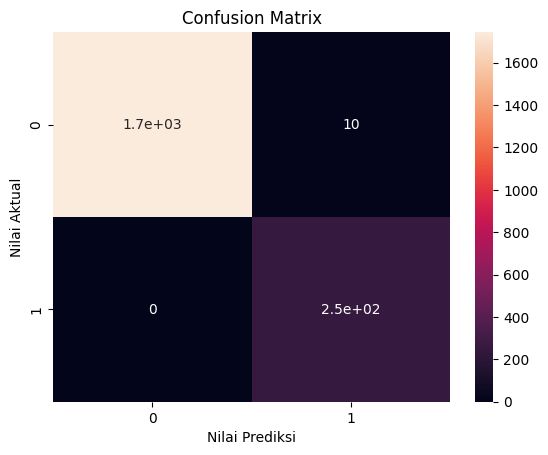

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Aktual')
plt.show()

In [22]:
report = classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1754
           1       0.96      1.00      0.98       246

    accuracy                           0.99      2000
   macro avg       0.98      1.00      0.99      2000
weighted avg       1.00      0.99      1.00      2000



Dari output diatas kita dapat mengetahui bahwa akurasi, presisi, recall, dan f1-score memiliki nilai yang sangat baik

### A3. Plot

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


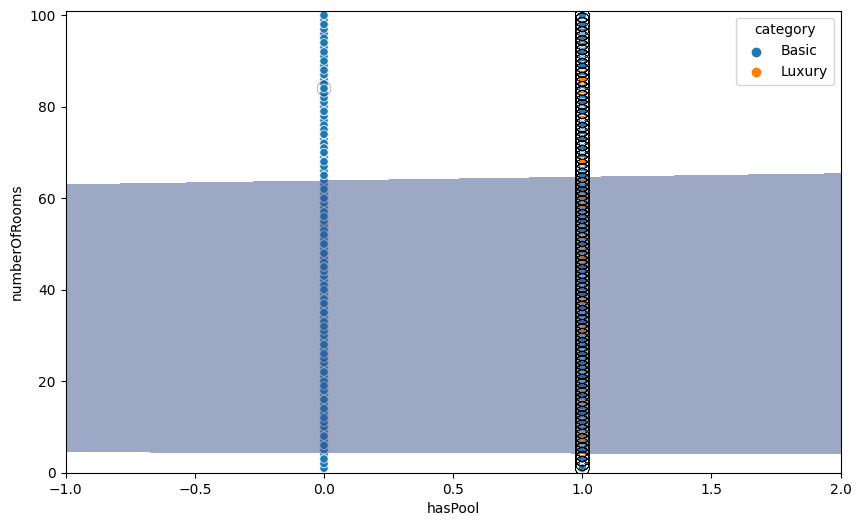

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['hasPool', 'numberOfRooms']]
y = df['category']

svm_model = SVC()
svm_model.fit(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hasPool', y='numberOfRooms', hue='category', data=df)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm_model,
    X=X.values, 
    plot_method="contourf",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)


ax.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=100,
    linewidth=0.2,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('hasPool')
plt.ylabel('numberOfRooms')
plt.show()

<AxesSubplot: xlabel='numberOfRooms', ylabel='price'>

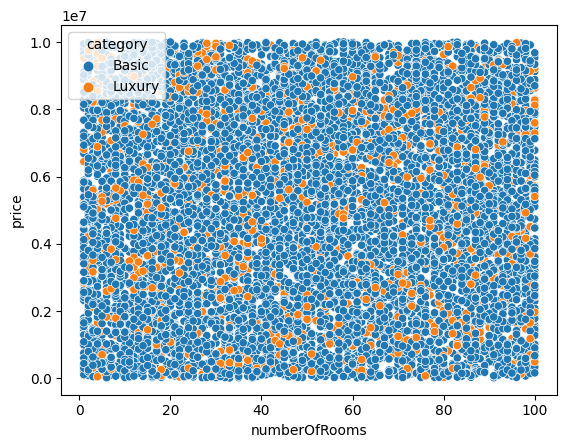

In [24]:
import seaborn as sns
sns.scatterplot(x='numberOfRooms', y='price', hue='category',data=df)

# B.Unsupervised Learning
### B1. Implementasikan metode K-Means

Sebelum itu kita mengimport modul KMeans terlebih dahulu dari sklearn.cluster

In [25]:
from sklearn.cluster import KMeans

Pada bagian ini kita memilih data yang bertipe integer dan float dan mendeklarasikan Within-Cluster Sum of Squares sebagai wcss

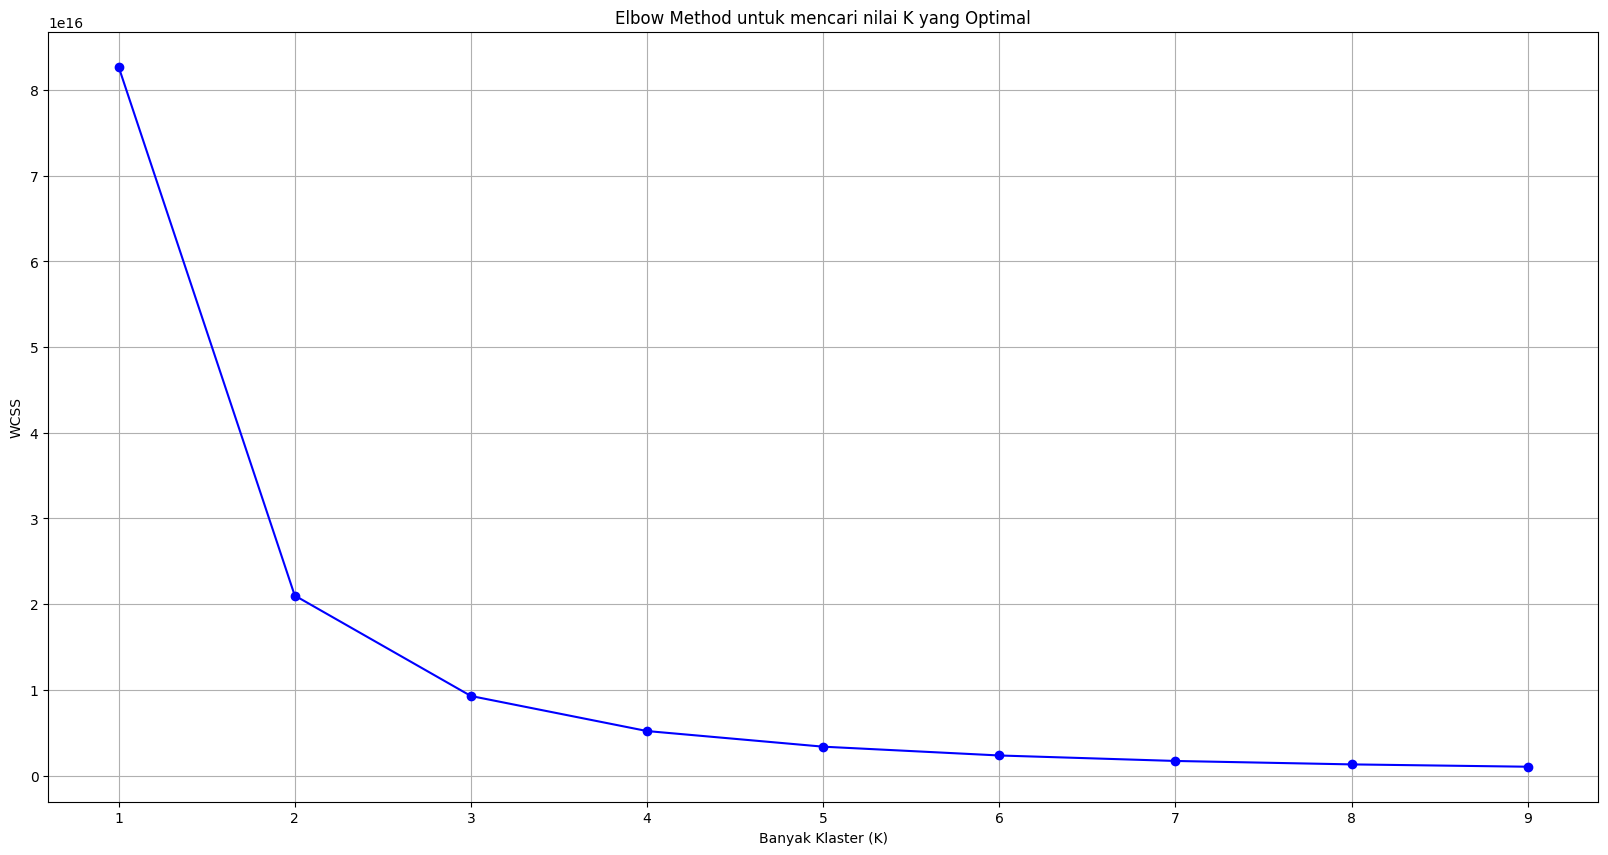

In [26]:
X = df.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

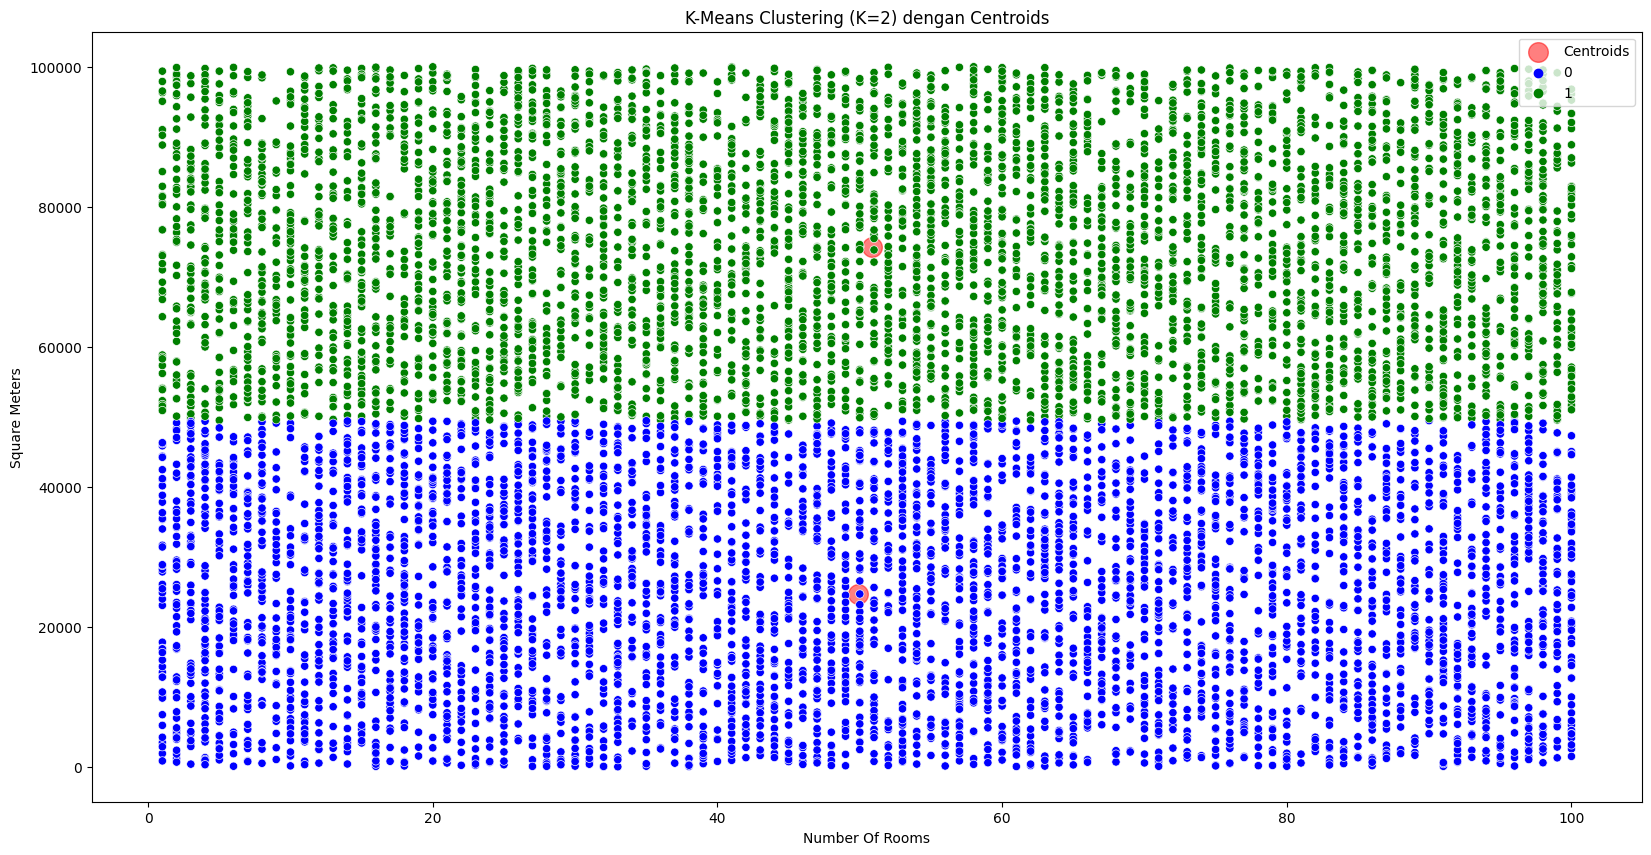

In [27]:
plt.figure(figsize=(20,10))

X = df[['numberOfRooms' , 'squareMeters']]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["clusters"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["blue", "green"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=200,
label='Centroids')

sns.scatterplot(data=df, x='numberOfRooms', y='squareMeters', hue="clusters", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel('Number Of Rooms')
plt.ylabel('Square Meters')
plt.legend()
plt.show()

Clustering merupakan teknik yang digunakan untuk mengelompokkan titik-titik data yang serupa ke dalam kelompok. Pada output diatas saya mengelompokkan cluster yang terdiri dari 2 kelompok

### B2. Cluster yang telah diprediksi harus dievaluasi :
### Unlabeled Dataset

Untuk evaluasi unlabeled dataset kita menggunakan silhouette_score, davies_bouldin_score, dan calinski_harabasz_score yang di import dari sklearn.metrics. Dari 

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score

ss_score = silhouette_score(X, cluster_labels)
print(f"Silchouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silchouette Score: 0.62
Davies-Bouldin Index: 0.51
Calinski-Harabasz Index: 29288.61


#### Labeled
Untuk evaluasi labeled dataset kita menggunakan adjusted_rand_score ,normalized_mutual_info_score ,homogeneity_score, completeness_score, dan v_measure_score  yang diimport dari sklearn.metrics

In [29]:
from sklearn.metrics import adjusted_rand_score 
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score 

cross_tab = pd.crosstab(df['squareMeters'].values.flatten(), cluster_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")


Cross-Tabulation:
col_0  0  1
row_0      
89     1  0
111    1  0
123    1  0
128    1  0
137    1  0
...   .. ..
99918  0  1
99932  0  1
99952  0  1
99985  0  1
99999  0  1

[9468 rows x 2 columns] 



In [30]:
true_labels = df['squareMeters'].values.flatten()
predicted_labels = cluster_labels

# Menghitung adjusted_rand_score
ari_score = adjusted_rand_score(true_labels, predicted_labels)

# Menghitung normalized_mutual_info_score
nmi_score = normalized_mutual_info_score(true_labels, predicted_labels)

# Menghitung homogeneity_score
homogeneity = homogeneity_score(true_labels, predicted_labels)

# Menghitung completeness_score
completeness = completeness_score(true_labels, predicted_labels)

# Menghitung v_measure_score
v_measure = v_measure_score(true_labels, predicted_labels)

print("Adjusted Rand Score:", ari_score)
print("Normalized Mutual Info Score:", nmi_score)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure Score:", v_measure)

Adjusted Rand Score: 2.7278677284232003e-05
Normalized Mutual Info Score: 0.1410655498483821
Homogeneity Score: 0.07588516627731362
Completeness Score: 1.0
V-Measure Score: 0.1410655498483821


## B3 Buat plot untuk hasil clustering-nya 
#### Label Asli

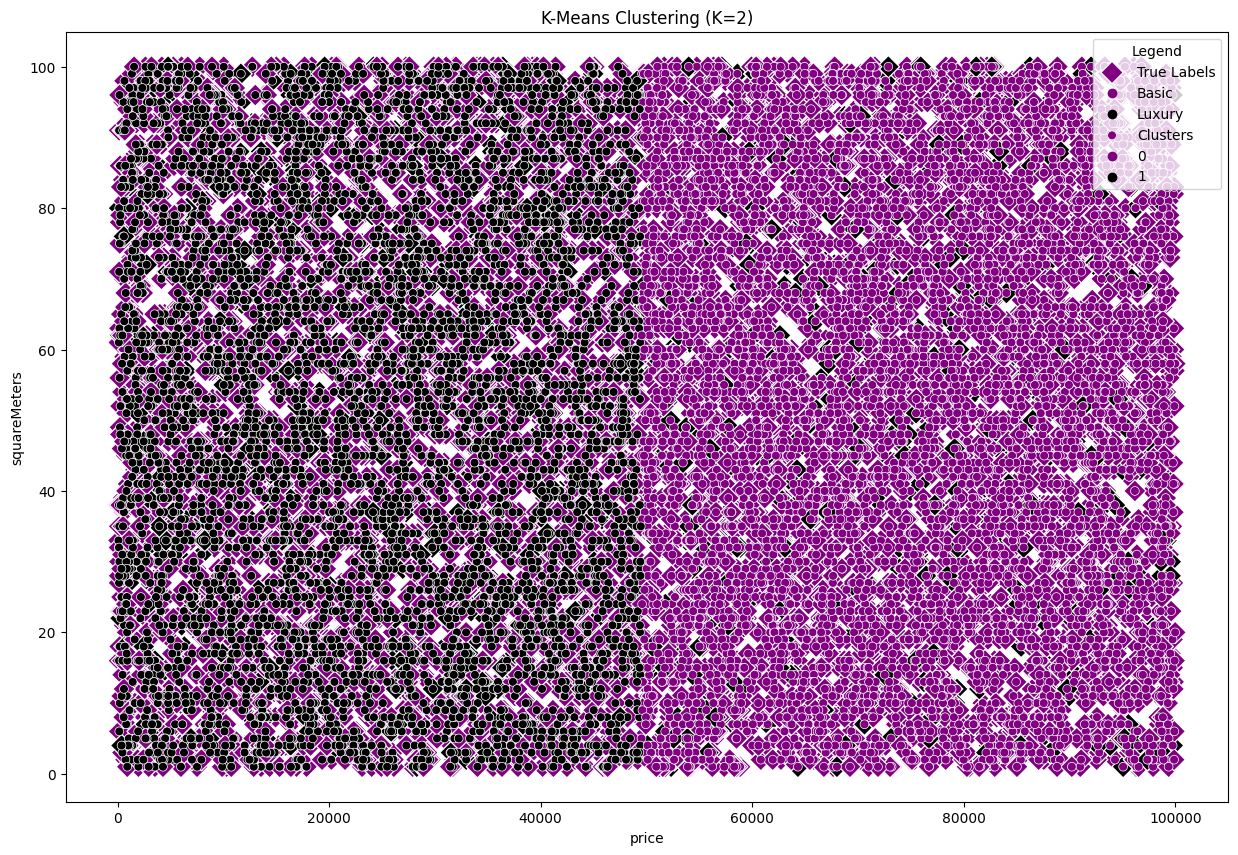

In [31]:
cluster_mapping = {0: 1, 1: 0, 2: 2}
df["cluster2"] = df["clusters"].map(cluster_mapping)

plt.figure(figsize=(15,10))
warna = ["purple", "black"]
sns.scatterplot(df, x='squareMeters', y='numberOfRooms', palette=warna,
hue='category', marker="D", s=130, label="True Labels")


sns.scatterplot(df, x='squareMeters', y='numberOfRooms', palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel('price')
plt.ylabel('squareMeters')
plt.legend(title="Legend", loc="upper right")
plt.show()

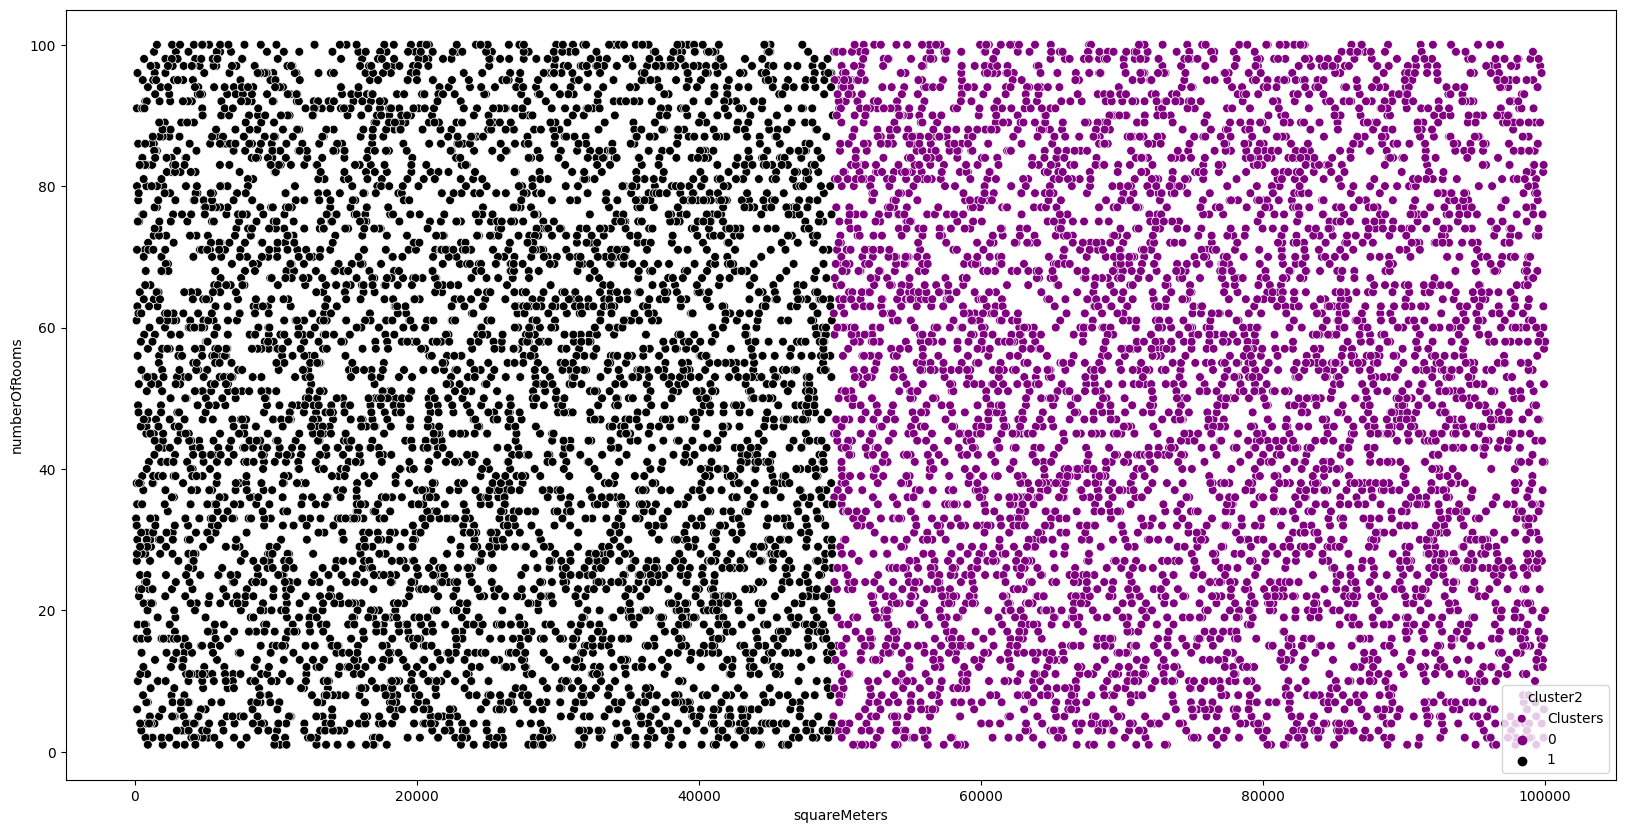

In [32]:
plt.figure(figsize=(20,10))

sns.scatterplot(df, x='squareMeters', y='numberOfRooms', palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")
plt.show()